# **Title: Pollutics - Predictive Analysis of Air Pollution Levels in South Korea Utilizing AI and Time Series Data**

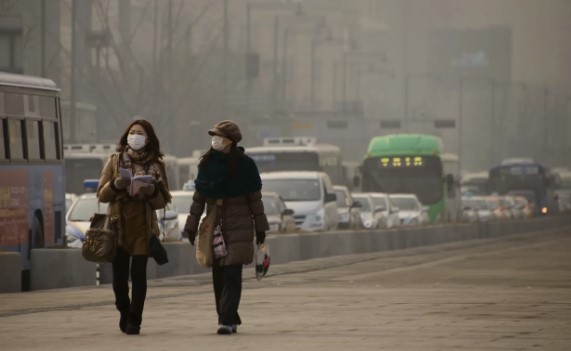

**Overview/Introduction:** Air pollution has been identified as a persisting environmental concern in South Korea, often reaching levels that pose serious health risks, especially to vulnerable populations such as the elderly and those with pre-existing health conditions. The urgency and significance of this problem demand a thorough analysis to help predict pollution levels for effective planning and risk management. This project aims to leverage the power of artificial intelligence and the wealth of available time-series data to build a predictive model for air pollution in South Korea.

**Problem Statement:** The varying levels of pollution, which can change due to weather and different times of the year, make it difficult for people in South Korea to know when they might be exposed to harmful pollutants and when they need to protect themselves. Moreover, without immediate and current data on pollution levels, the government and environmental groups face challenges in acting quickly and effectively to control pollution.


**Objectives:**
1.	To develop an AI model capable of predicting air pollutant levels in South Korea utilizing the provided time-series dataset.
2.	To identify key contributing factors to the fluctuations in pollution levels and provide insights that can guide policy-making and intervention strategies.
3.	To aid in creating a public alert system for potential pollution spikes, enabling citizens to take necessary precautions and adjust their outdoor activities accordingly.


**Dataset Description:** Background: The repercussions of air pollution in South Korea have been increasingly recognized as a major public health concern. During episodes of high pollution, residents are often urged to refrain from venturing outdoors. Seasonal variations and meteorological conditions significantly influence these pollution levels, thus rendering accurate forecasting of pollution levels crucial for effective planning and preventive measures.


Data Details:
Pollution Parameters:
•	Date of Measurement: The day the observation was made.
•	PM2.5: Fine particulate matter with a diameter of 2.5 micrometers or smaller (expressed in µg/m3).
•	PM10: Fine particulate matter with a diameter of 10 micrometers or smaller (expressed in µg/m3).
•	O3: Ozone levels (expressed in µg/m3).
•	NO2: Nitrogen Dioxide concentration (expressed in ppm).
•	SO2: Sulfur Dioxide concentration (expressed in ppm).
•	CO: Carbon Monoxide concentration (expressed in ppm).
•	Geographic Coordinates: Latitude and longitude where the measurement was taken.
•	Administrative Locations: City, district, and country where the observation was conducted.


By deploying machine learning techniques on this comprehensive dataset, this project aims to address the critical environmental issue of air pollution in South Korea and foster an informed and proactive approach towards managing this crisis.

**Daatset URL:** https://www.kaggle.com/datasets/calebreigada/south-korean-pollution


**Technologies Used:**
The project leverages the power of Python, one of the leading programming languages for data science. Key libraries employed in the analysis include:

1. `pandas`: This library is used for efficient manipulation of structured data.
2. `numpy`: It provides support for numerical operations like handling arrays and matrices.
3. `matplotlib`: This library is used to visualize the data.
4. `csv`: It's used to read the data from a CSV file.
5. `tensorflow`: This is the machine learning library used to train predictive models.
6. `keras`: A high-level API to build and train models in TensorFlow.

**Methodology:**
The methodology can be broken down into six stages:

1. **Data Loading**: Using pandas and csv, the dataset is loaded into a DataFrame.
2. **Data Cleaning**: The data is examined for duplicates and missing values. The missing values are replaced with numpy NaN values.
3. **Data Exploration**: Basic analysis and plotting of the dataset are done using pandas and matplotlib.
4. **Data Preparation**: The data is split into training and validation sets, and windowed datasets are created for time series analysis.
5. **Model Building**: Various models including Dense, SimpleRNN, Bi-directional LSTM, Conv1D + LSTM, and Conv1D are built and trained on the dataset.
6. **Model Evaluation**: Each model is evaluated on the validation set and their predictions are plotted for visual comparison.

**Implementation:**
The implementation of this project is made possible by Python's extensive ecosystem of data science libraries. The pandas library is used to load and preprocess the data, and to perform basic exploratory data analysis. The matplotlib library is used to visualize the dataset.

For the machine learning aspect of the project, TensorFlow and Keras are used. These libraries are leveraged to build several types of neural networks, including a fully connected network (Dense), a simple recurrent neural network (SimpleRNN), a bidirectional long short-term memory network (Bi-directional LSTM), a network combining 1D convolutional and LSTM layers (Conv1D + LSTM), and a pure 1D convolutional neural network (Conv1D). These models are trained using the Huber loss function, the Adam optimizer, and the Mean Absolute Error (MAE) metric.

**Results:**
The table provides an evaluation of five different predictive models - Bi-LSTM, Simple RNN, Model_Dense1, Conv1D, and Conv1D + LSTM. Evaluation metrics are Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE), Mean Absolute Scaled Error (MASE), and R-squared (R2).

In terms of MAE, Bi-LSTM is the best performing model, closely followed by Simple RNN. They have an MAE of 13.86 and 13.87 respectively. This implies that on average, these models deviate from the actual values by about 13.9 units. The highest MAE is reported by the Conv1D + LSTM model at 14.86, which might suggest a greater average deviation from the actual values compared to the other models.

**Discussion:**
In addition to MAE, other metrics also provide critical insights into model performance. When observing the MSE and RMSE metrics, we see similar patterns, where Bi-LSTM and Simple RNN models are leading, although the margin of error becomes larger (up to 18.34 units for RMSE). It is interesting to note that despite having a lower MAE, Simple RNN has a higher RMSE than Bi-LSTM, which suggests Simple RNN might be more affected by larger errors. The R2 score indicates how well the regression predictions approximate the real data points. An R2 of 0.388415 for Bi-LSTM suggests it accounts for approximately 39% of the variability in the target variable.


**Conclusion:**
Based on the metrics used for evaluation, the Bi-LSTM model appears to be the best choice, with the lowest MAE, MSE, RMSE, and highest R2 among all. However, when considering practical application, model selection should be based on the problem's specific requirements and constraints. For instance, if computational efficiency is crucial, Simple RNN might be a better choice despite its slightly higher error metrics.

Further studies may also be required to optimize these models or to explore the potential of hybrid models. Besides, outlier management and different scaling techniques can also be tried to improve the overall performance of these models.



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/south-korean-pollution/south-korean-pollution-data.csv
/kaggle/input/south-korean-pollution/south_korean_weather.csv


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [ ]:
df = pd.read_csv("/kaggle/input/south-korean-pollution/south-korean-pollution-data.csv")
df.head()

,Unnamed: 0,date,pm25,pm10,o3,no2,so2,co,Lat,Long,City,District,Country
0,0,2022/2/1,112,31,35,2,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
1,1,2022/2/2,92,21,35,2,1,0,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
2,2,2022/2/3,60,20,35,1,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
3,3,2022/2/4,51,27,33,1,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
4,4,2022/2/5,57,24,27,2,1,5,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea


The following code shows the import of the pandas library and the reading of a CSV file into a pandas DataFrame. The date column is parsed as a datetime column, and the DataFrame is indexed by the date column.

In [ ]:
# Import with pandas
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/kaggle/input/south-korean-pollution/south-korean-pollution-data.csv",
                 parse_dates=["date"],
                 index_col=["date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Unnamed: 0,pm25,pm10,o3,no2,so2,co,Lat,Long,City,District,Country
date,,,,,,,,,,,,
2022-02-01,0,112,31,35,2,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
2022-02-02,1,92,21,35,2,1,0,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
2022-02-03,2,60,20,35,1,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
2022-02-04,3,51,27,33,1,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
2022-02-05,4,57,24,27,2,1,5,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea


The following code shows filtering the DataFrame to include only "pm25" values in the Jeongnim-Dong City, sorted by date. It then displays the first few rows of the filtered DataFrame.

In [ ]:
#Filters for only pm25 values in Jeongnim-Dong City, sorted by date
df = df[df.City == 'Jeongnim-Dong'].pm25.sort_index()
df.head()

date
2013-12-31    0
2014-01-01    0
2014-01-02    0
2014-01-03    0
2014-01-04    0
Name: pm25, dtype: int64

In [ ]:
# How many samples do we have?
len(df)

2880

The next code calculates and prints the number of data points in the dataset. The subsequent code checks for duplicates in the dataset and prints the number of duplicates found. The code then checks for missing values in the dataset and prints the number of missing values in each column and the total number of missing values. After that, the code replaces empty strings with NaN values in the dataset and checks for missing values again, printing the updated counts.

In [ ]:
import numpy as np

# How many data do we have?
print('There are', df.shape[0], 'data in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
missing_values = df.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

print('Number of Missing Values:', df.isnull().sum().sum())

df.replace("", np.nan, inplace=True)
missing_values = df.isnull().sum()
print('Number of Missing Values by column after replacement:\n',missing_values)
print('Number of Missing Values after replacement:', df.isnull().sum().sum())

There are 2880 data in this dataset
Number of Duplicates: 2732
Number of Missing Values by column:
 0
Number of Missing Values: 0
Number of Missing Values by column after replacement:
 0
Number of Missing Values after replacement: 0


Next, the code retrieves the first and last dates from the index of the DataFrame and combines them into a single string representing the date range.

In [ ]:
# get the first and last date from the index
first_date = df.index.min().strftime('%Y-%m-%d')
last_date = df.index.max().strftime('%Y-%m-%d')

# combine the dates into a single string
date_range = f"{first_date} to {last_date}"
date_range

'2013-12-31 to 2022-02-20'

The code imports the matplotlib library and plots the "pm25" values from the DataFrame, setting the figure size, y-axis label, and title. It also adds a legend to the plot.

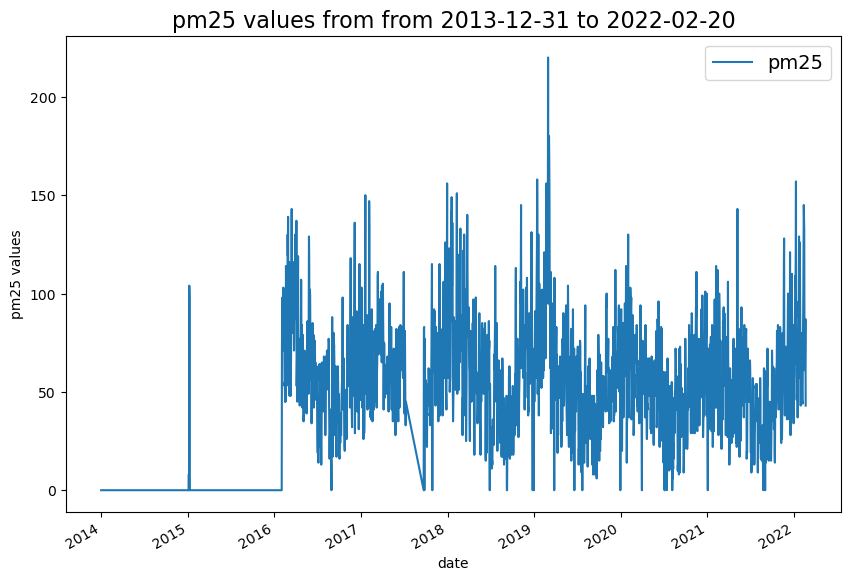

In [ ]:
import matplotlib.pyplot as plt
df.plot(figsize=(10, 7))
plt.ylabel("pm25 values")
plt.title(f"pm25 values from from {date_range}", fontsize=16)
plt.legend(fontsize=14);

The following code sets the start and end dates for the dataset as January 1, 2018, and January 1, 2022, respectively. It then filters the DataFrame to include only the data within this date range and displays the first few rows of the updated dataset.

In [ ]:
#starts the dataset at 2018 and ends in 2022 (due to breaks in data in previous years)
start = pd.to_datetime('2018-01-01')
end = pd.to_datetime('2022-01-01')

In [ ]:
df = df[start:end]
print('SAMPLE OF TIME SERIES DATA:')
df.head()

SAMPLE OF TIME SERIES DATA:


date
2018-01-01    72
2018-01-02    95
2018-01-03    57
2018-01-04    70
2018-01-05    88
Name: pm25, dtype: int64

The code calculates descriptive statistics for the DataFrame, specifically for each column, and transposes the result for better readability.

In [ ]:
df.describe().T

count    1458.000000
mean       55.806584
std        27.535956
min         0.000000
25%        37.250000
50%        54.000000
75%        72.000000
max       220.000000
Name: pm25, dtype: float64

Next, the code imports the matplotlib library again and plots the "pm25" values from the DataFrame, similar to the previous plot, using the date range obtained earlier.

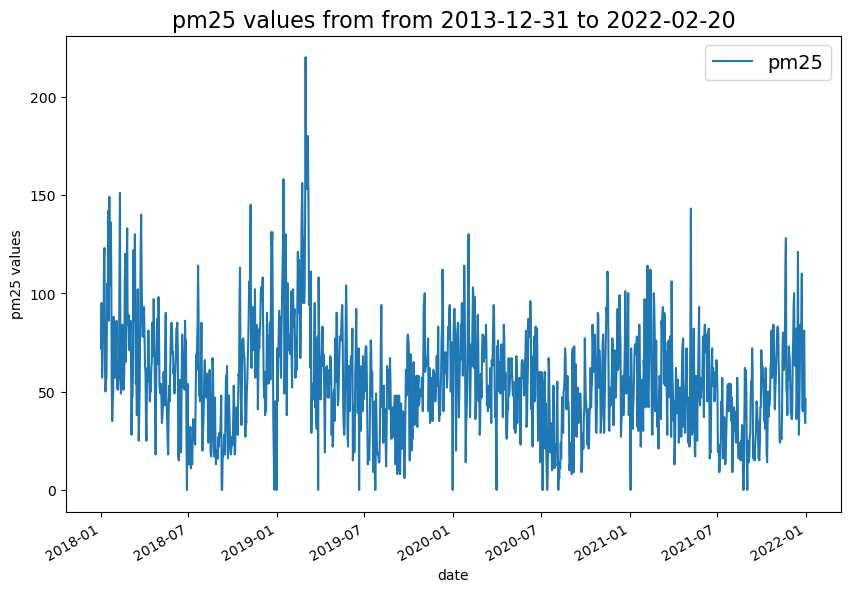

In [ ]:
import matplotlib.pyplot as plt
df.plot(figsize=(10, 7))
plt.ylabel("pm25 values")
plt.title(f"pm25 values from from {date_range}", fontsize=16)
plt.legend(fontsize=14);

**Utilities**

The code defines a function called "plot_series" that visualizes time series data. It takes inputs such as time steps, measurements, line style, and the range of time steps to plot. The function plots the time series data, labels the axes, overlays a grid, and displays the graph.

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

**Import Data with Python**

The code imports the csv library and opens a CSV file containing pollution data. It reads the file using a CSV reader and prints the column names. It also finds the indices of columns with specific names such as "date," "City," and "pm25" and prints their respective indices.

In [ ]:
import csv

# Open the CSV file
with open("/kaggle/input/south-korean-pollution/south-korean-pollution-data.csv", "r") as f:

    # Create a CSV reader object
    reader = csv.reader(f)

    # Read the first row (header) of the CSV file
    header = next(reader)

    # Print the column names
    print(header)

    # Find the indices of columns with names "Date" and "Close"
    date_index = header.index("date")
    city_index = header.index("City")
    pm25_index = header.index("pm25")

    # Print the indices for columns "Date" and "Close"
    print("Index for column 'Date':", date_index)
    print("Index for column 'City':", city_index)
    print("Index for column 'pm25':", pm25_index)

['', 'date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'Lat', 'Long', 'City', 'District', 'Country']
Index for column 'Date': 1
Index for column 'City': 10
Index for column 'pm25': 2


Next, the code extracts the date array and series values from the DataFrame, displaying the first ten elements of each.

In [ ]:
# Get date array
time = df.index.to_numpy()
series = df.values

time[:10], series[:10]

(array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
        '2018-01-03T00:00:00.000000000', '2018-01-04T00:00:00.000000000',
        '2018-01-05T00:00:00.000000000', '2018-01-06T00:00:00.000000000',
        '2018-01-07T00:00:00.000000000', '2018-01-08T00:00:00.000000000',
        '2018-01-09T00:00:00.000000000', '2018-01-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([ 72,  95,  57,  70,  88,  76, 119, 123,  62,  50]))

**Split the Dataset**

The code defines the split time for training and validation data, splitting the series based on the defined ratio. It creates separate arrays for time and the series data for both the training and validation sets.

In [ ]:
# Define the split time
split_ratio = 0.8  # 80% for the training set
split_time = int(len(series) * split_ratio)

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

In [ ]:
time_train[:2], x_train[:2], time_valid[:2], x_valid[:2]

(array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([72, 95]),
 array(['2021-03-16T00:00:00.000000000', '2021-03-17T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([53, 67]))

In [ ]:
len(time_train), len(x_train), len(time_valid), len(x_valid),

(1166, 1166, 292, 292)

Finally, the code plots a graph displaying the train-test split, with the training data shown in orange and the test data shown in blue. The x-axis represents dates, and the y-axis represents the "pm25" values.

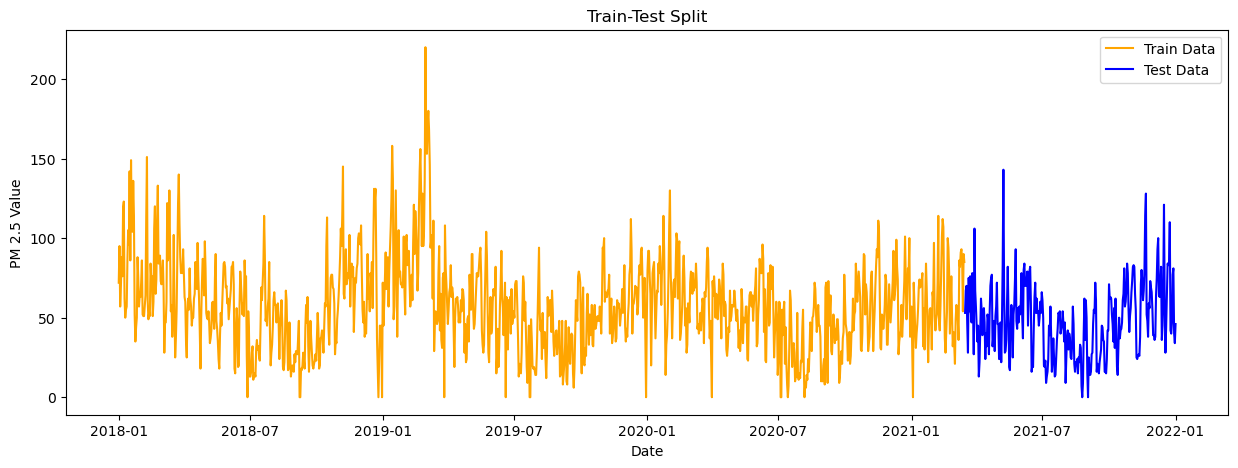

In [ ]:
#displays a plot of the train/test split
fig = plt.figure(figsize=(15,5))
plt.plot(time_train, x_train, color='orange', label='Train Data')
plt.plot(time_valid, x_valid, color='blue', label='Test Data')
plt.xlabel('Date')
plt.ylabel('PM 2.5 Value')
plt.title('Train-Test Split')
plt.legend()
plt.show()

**Prepare Features and Labels**

The next code block defines the parameters for creating windowed datasets for time series analysis. It specifies the window size, batch size, and shuffle buffer size.

In [ ]:
# Parameters
window_size = 7
batch_size = 32
shuffle_buffer_size = 1000

The windowed_dataset function generates a TensorFlow Dataset object containing time windows. It takes the series data, window size, batch size, and shuffle buffer size as inputs and returns the dataset.

In [ ]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

The code block generates the dataset windows for the training set using the windowed_dataset function.

In [ ]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

The next code block generates data windows for the validation set using the windowed_dataset function.

In [ ]:
# Generate data windows of the validation set
val_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [ ]:
dataset, val_set

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

The code block prints the shape of a sample batch from the training dataset, showing the shape of the input features and labels.

In [ ]:
for a,b in dataset.take(1):
    print(a.shape)
    print(b.shape)

(32, 7)
(32,)


The code block prints the shape of a sample batch from the validation dataset, showing the shape of the input features and labels.

In [ ]:
for c,d in val_set.take(1):
    print(c.shape)
    print(d.shape)

(32, 7)
(32,)


**Model: Dense**

The following code block builds a baseline model using the Sequential API of TensorFlow's Keras module. The model consists of three dense layers with 32, 16, and 1 units, respectively, and ReLU activation. It then prints a summary of the model, which provides an overview of the model's architecture and the number of parameters.

In [ ]:
tf.random.set_seed(42)

# Build the model
model_baseline = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Print the model summary
model_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


The next code block imports necessary modules for defining the loss function (Huber) and optimizer (Adam). It sets the training parameters for the baseline model by specifying the loss function, optimizer, and metrics (mean absolute error).

In [ ]:
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam

# Set the training parameters
model_baseline.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae']
)

The code block trains the baseline model using the fit method, providing the training dataset (dataset) and the validation dataset (val_set) as input, and specifying the number of epochs.

In [ ]:
# Train the model
model_baseline.fit(dataset,validation_data=val_set, epochs=100)

Epoch 1/100
37/37 [==============================] - 2s 23ms/step - loss: 48.0413 - mae: 48.5400 - val_loss: 19.4319 - val_mae: 19.9254
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 18.3172 - mae: 18.8125 - val_loss: 16.4792 - val_mae: 16.9713
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 16.9441 - mae: 17.4375 - val_loss: 15.6863 - val_mae: 16.1820
Epoch 4/100
37/37 [==============================] - 0s 6ms/step - loss: 16.2579 - mae: 16.7519 - val_loss: 15.0942 - val_mae: 15.5827
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 15.8167 - mae: 16.3119 - val_loss: 14.6567 - val_mae: 15.1472
Epoch 6/100
37/37 [==============================] - 0s 5ms/step - loss: 15.5032 - mae: 15.9956 - val_loss: 14.3768 - val_mae: 14.8732
Epoch 7/100
37/37 [==============================] - 0s 4ms/step - loss: 15.2537 - mae: 15.7459 - val_loss: 14.2667 - val_mae: 14.7589
Epoch 8/100
37/37 [==============================] - 0

After training the model, the code block evaluates the model's performance on the validation dataset using the evaluate method, which returns the loss and metrics values.

In [ ]:
# Evaluate model on test data
model_baseline.evaluate(val_set)

9/9 [==============================] - 0s 5ms/step - loss: 13.6987 - mae: 14.1881


[13.698735237121582, 14.188100814819336]

The code uses the trained model to generate predictions on the validation dataset and assigns the predictions to the model_1_preds variable.

In [ ]:
model_1_preds = model_baseline.predict(val_set)
model_1_preds.shape

9/9 [==============================] - 0s 5ms/step


(285, 1)

The next code block defines the model_forecast function, which takes a trained model, a time series, window size, and batch size as inputs, and returns the model's predictions on the input data. It uses TensorFlow's Dataset API to prepare the input data and generates predictions using the trained model.

In [ ]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

The code block reduces the original series by selecting a subset of data from the validation set for forecasting. It then calls the model_forecast function to generate predictions using the baseline model and the reduced series. The predictions are stored in the forecast variable. Next, the code block drops the single-dimensional axis from the forecast and the original validation data. It then plots the results, showing the actual values (x_valid) and the predicted values (results) against time.

10/10 [==============================] - 0s 8ms/step


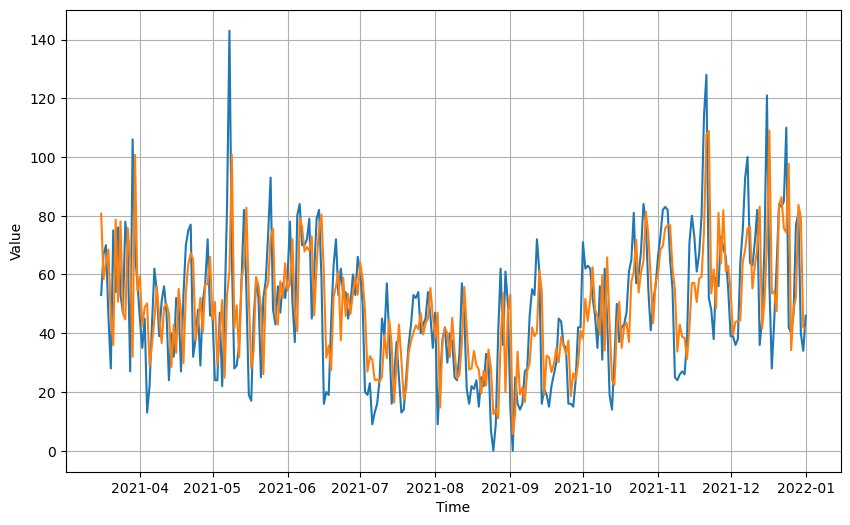

In [ ]:
# Reduce the original series
forecast_series = series[split_time - window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model_baseline, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

The code block defines several evaluation metrics functions, including mean absolute scaled error (MASE), R-squared, and metrics for evaluating predictions. These functions are used to evaluate the performance of the model.

In [ ]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

def r_squared(y_true, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
    r2 = tf.subtract(1.0, tf.divide(residual, total))
    return r2

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  r2 = r_squared(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy(),
          "r2": r2.numpy()}  # Add R2 score


The code block calculates and prints the evaluation metrics for the baseline model's predictions on the validation data.

In [ ]:
# Evaluate preds
results_base = evaluate_preds(y_true=x_valid, # reduce to right shape
                                 y_pred=results)
results_base

{'mae': 14.347912,
 'mse': 355.89767,
 'rmse': 18.86525,
 'mape': 62194290.0,
 'mase': 0.9716645,
 'r2': 0.32279432}

**Model: SimpleRNN**

The next code block builds a model using a simple RNN (recurrent neural network) architecture. The model includes two layers of SimpleRNN cells with 256 and 128 units, respectively. It also includes a Dense layer with 1 unit for the output. The model is compiled with the Huber loss function, Adam optimizer, and mean absolute error (MAE) metric. The code next trains the RNN model using the fit method, providing the training dataset (dataset) and the validation dataset (val_set) as input, and specifying the number of epochs.

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.SimpleRNN(256, return_sequences=True),
  tf.keras.layers.SimpleRNN(128),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['mae'])

# Train the model
history = model.fit(dataset,epochs=100, validation_data=val_set)

Epoch 1/100
37/37 [==============================] - 3s 26ms/step - loss: 24.4639 - mae: 24.9592 - val_loss: 16.1015 - val_mae: 16.5980
Epoch 2/100
37/37 [==============================] - 1s 14ms/step - loss: 15.3003 - mae: 15.7905 - val_loss: 16.4425 - val_mae: 16.9391
Epoch 3/100
37/37 [==============================] - 1s 15ms/step - loss: 15.6290 - mae: 16.1218 - val_loss: 16.4806 - val_mae: 16.9714
Epoch 4/100
37/37 [==============================] - 1s 14ms/step - loss: 15.5069 - mae: 15.9980 - val_loss: 13.4656 - val_mae: 13.9599
Epoch 5/100
37/37 [==============================] - 1s 14ms/step - loss: 14.9370 - mae: 15.4310 - val_loss: 13.2929 - val_mae: 13.7836
Epoch 6/100
37/37 [==============================] - 1s 16ms/step - loss: 14.8425 - mae: 15.3335 - val_loss: 13.8888 - val_mae: 14.3853
Epoch 7/100
37/37 [==============================] - 1s 15ms/step - loss: 14.9927 - mae: 15.4853 - val_loss: 14.5944 - val_mae: 15.0882
Epoch 8/100
37/37 [=============================

After training the model, the code block generates predictions using the trained model and the reduced series from the validation set. It then drops the single-dimensional axis from the forecast and the original validation data. Finally, it plots the results, showing the actual values and the predicted values.

10/10 [==============================] - 0s 10ms/step


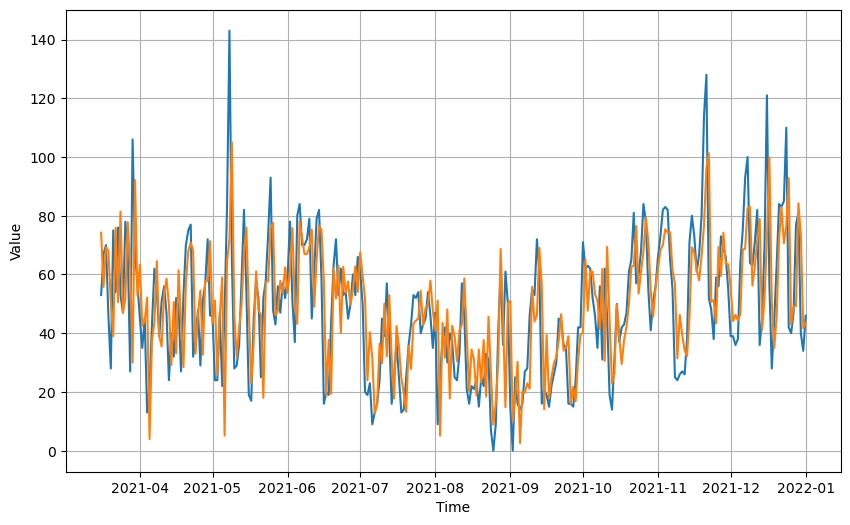

In [ ]:
# Reduce the original series
forecast_series = series[split_time - window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

The code block evaluates the predictions of the RNN model using the evaluation metrics defined earlier and prints the results.

In [ ]:
# Evaluate preds
results_rnn = evaluate_preds(y_true=x_valid, # reduce to right shape
                                 y_pred=results)
results_rnn

{'mae': 13.873719,
 'mse': 336.52924,
 'rmse': 18.344732,
 'mape': 64378080.0,
 'mase': 0.93955135,
 'r2': 0.35964876}

**Model: Bi-directional LSTM**

The next code block builds a model using a bidirectional LSTM (long short-term memory) architecture. First, it resets the states generated by Keras to ensure a clean state for building the next model. The model includes two layers of bidirectional LSTM cells with 128 units each. It also includes a Dense layer with 256 units and a dropout layer with a rate of 0.4. The model is compiled with the Huber loss function, Adam optimizer, and mean absolute error (MAE) metric. The code block trains the LSTM model using the fit method, providing the training dataset (dataset) and the validation dataset (val_set) as input, and specifying the number of epochs.

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(1),
#   tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['mae'])

# Train the model
history = model.fit(dataset,epochs=100, validation_data=val_set)

Epoch 1/100
37/37 [==============================] - 12s 87ms/step - loss: 54.2395 - mae: 54.7392 - val_loss: 40.8589 - val_mae: 41.3574
Epoch 2/100
37/37 [==============================] - 2s 41ms/step - loss: 44.9830 - mae: 45.4811 - val_loss: 28.3176 - val_mae: 28.8127
Epoch 3/100
37/37 [==============================] - 2s 45ms/step - loss: 31.9542 - mae: 32.4510 - val_loss: 19.3753 - val_mae: 19.8722
Epoch 4/100
37/37 [==============================] - 2s 42ms/step - loss: 23.9510 - mae: 24.4454 - val_loss: 17.8098 - val_mae: 18.3087
Epoch 5/100
37/37 [==============================] - 2s 43ms/step - loss: 21.6297 - mae: 22.1255 - val_loss: 18.6022 - val_mae: 19.0985
Epoch 6/100
37/37 [==============================] - 2s 40ms/step - loss: 21.2264 - mae: 21.7192 - val_loss: 18.7577 - val_mae: 19.2531
Epoch 7/100
37/37 [==============================] - 2s 46ms/step - loss: 21.0845 - mae: 21.5795 - val_loss: 18.5777 - val_mae: 19.0738
Epoch 8/100
37/37 [============================

After training the model, the code block generates predictions using the trained model and the reduced series from the validation set. It then drops the single-dimensional axis from the forecast and the original validation data. Finally, it plots the results, showing the actual values and the predicted values.

10/10 [==============================] - 2s 18ms/step


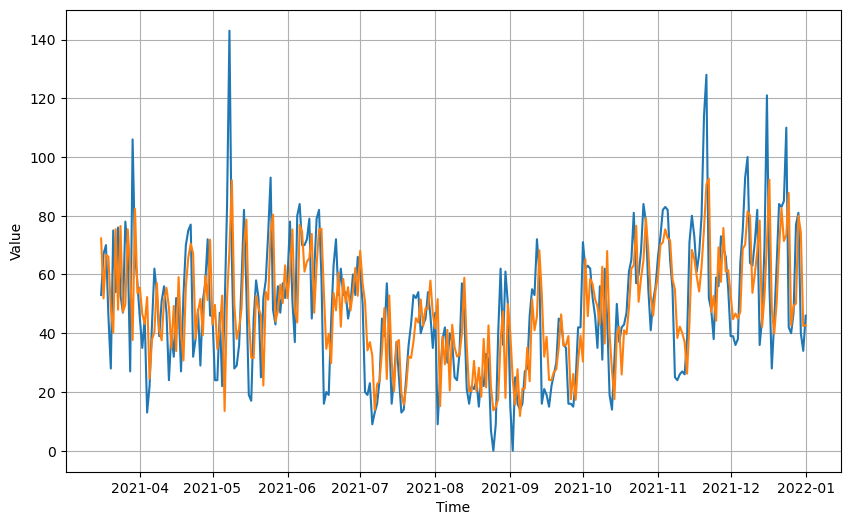

In [ ]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

The code block evaluates the predictions of the LSTM model using the evaluation metrics defined earlier and prints the results.

In [ ]:
# Evaluate preds
results_bilstm = evaluate_preds(y_true=x_valid, # reduce to right shape
                                 y_pred=results)
results_bilstm

{'mae': 13.8597145,
 'mse': 321.41144,
 'rmse': 17.927952,
 'mape': 130432980.0,
 'mase': 0.938603,
 'r2': 0.3884151}

**Model: Conv1D + LSTM**

The code block builds a model using a combination of convolutional and LSTM layers. The model includes a 1D convolutional layer with 64 filters, a kernel size of 3, and "causal" padding. It also includes two layers of bidirectional LSTM cells with 128 units each. The model further includes a dropout layer with a rate of 0.3, a dense layer with 512 units and "relu" activation, and a dense layer with 1 unit. The model's output is multiplied by 400 using a lambda layer.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Lambda, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[window_size, 1]),
  tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True)),
  tf.keras.layers.Bidirectional(LSTM(128)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 64)             256       
                                                                 
 bidirectional (Bidirectiona  (None, 7, 256)           197632    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

The code block sets the training parameters for the model, compiling it with the Huber loss function, Adam optimizer, and mean absolute error (MAE) metric.

In [ ]:
# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['mae'])


The code block trains the model using the fit method, providing the training dataset (dataset) and the validation dataset (val_set) as input, and specifying the number of epochs.

In [ ]:
# Train the model
history = model.fit(dataset, epochs=100, validation_data=val_set)

Epoch 1/100
37/37 [==============================] - 13s 96ms/step - loss: 56.5211 - mae: 57.0202 - val_loss: 31.4193 - val_mae: 31.9123
Epoch 2/100
37/37 [==============================] - 2s 44ms/step - loss: 38.2971 - mae: 38.7940 - val_loss: 15.3949 - val_mae: 15.8890
Epoch 3/100
37/37 [==============================] - 2s 45ms/step - loss: 28.8947 - mae: 29.3911 - val_loss: 15.6740 - val_mae: 16.1667
Epoch 4/100
37/37 [==============================] - 2s 44ms/step - loss: 25.2657 - mae: 25.7614 - val_loss: 14.1032 - val_mae: 14.5957
Epoch 5/100
37/37 [==============================] - 2s 43ms/step - loss: 23.0418 - mae: 23.5384 - val_loss: 15.4533 - val_mae: 15.9448
Epoch 6/100
37/37 [==============================] - 2s 44ms/step - loss: 20.9217 - mae: 21.4148 - val_loss: 14.1882 - val_mae: 14.6785
Epoch 7/100
37/37 [==============================] - 2s 45ms/step - loss: 20.3523 - mae: 20.8465 - val_loss: 13.7389 - val_mae: 14.2336
Epoch 8/100
37/37 [============================

After training the model, the code block generates predictions using the trained model and the reduced series from the validation set. It then drops the single-dimensional axes from the forecast and the original validation data. Finally, it plots the results, showing the actual values and the predicted values.

10/10 [==============================] - 2s 18ms/step


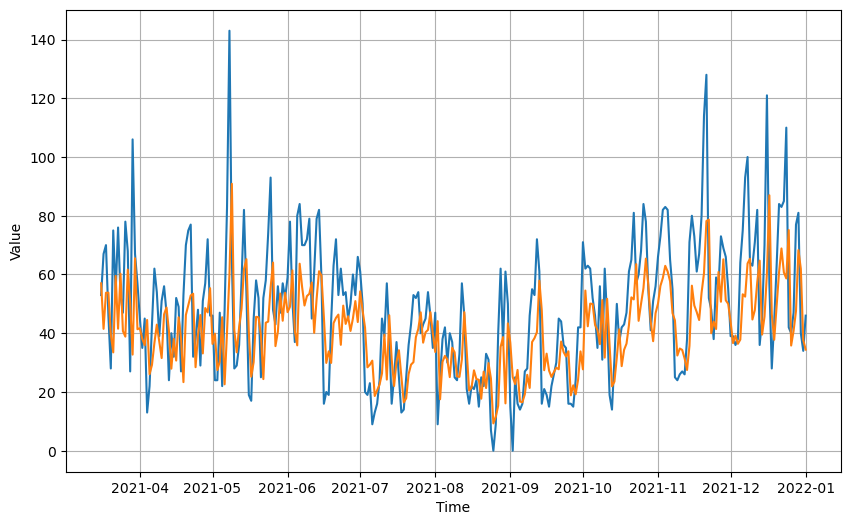

In [ ]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

The code block evaluates the predictions of the model using the evaluation metrics defined earlier and prints the results.

In [ ]:
# Evaluate preds
results_convlstm = evaluate_preds(y_true=x_valid, # reduce to right shape
                                 y_pred=results)
results_convlstm

{'mae': 14.855733,
 'mse': 368.2349,
 'rmse': 19.189447,
 'mape': 117767864.0,
 'mase': 1.006055,
 'r2': 0.29931897}

**Model: Conv1D**

The following code defines a CNN (Convolutional Neural Network) model using TensorFlow's Keras API. The model includes Conv1D layers, GlobalAveragePooling1D, Flatten, Dropout, and Dense layers. The Lambda layer is used to add an extra axis to the input data. The model is compiled with the Huber loss function, Adam optimizer, and mean absolute error (MAE) metric. It then prints a summary of the model, providing an overview of its architecture and the number of parameters.

In [ ]:
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Flatten


cnn_model = Sequential([
    # add extra axis to input data
    Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[window_size]),
    Conv1D(filters=32, kernel_size=3, strides=1,
           padding='causal', activation='relu'),
    Conv1D(filters=64, kernel_size=3, strides=1,
           padding='causal', activation='relu'),
    GlobalAveragePooling1D(),
    Flatten(),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(1)
])

cnn_model.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae']
)

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 7, 1)              0         
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 32)             128       
                                                                 
 conv1d_2 (Conv1D)           (None, 7, 64)             6208      
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                      

The code block trains the CNN model using the fit method, providing the training dataset (dataset) and the validation dataset (val_set) as input, and specifying the number of epochs. The verbose=0 argument is used to suppress the progress output during training.

In [ ]:
#Trains CNN Model
cnn_history = cnn_model.fit(dataset, epochs=100, validation_data=val_set,verbose=0)

After training the model, the code block generates predictions using the trained CNN model and the reduced series from the validation set. It then drops the single-dimensional axes from the forecast and the original validation data. Finally, it plots the results, showing the actual values and the predicted values.

10/10 [==============================] - 0s 9ms/step


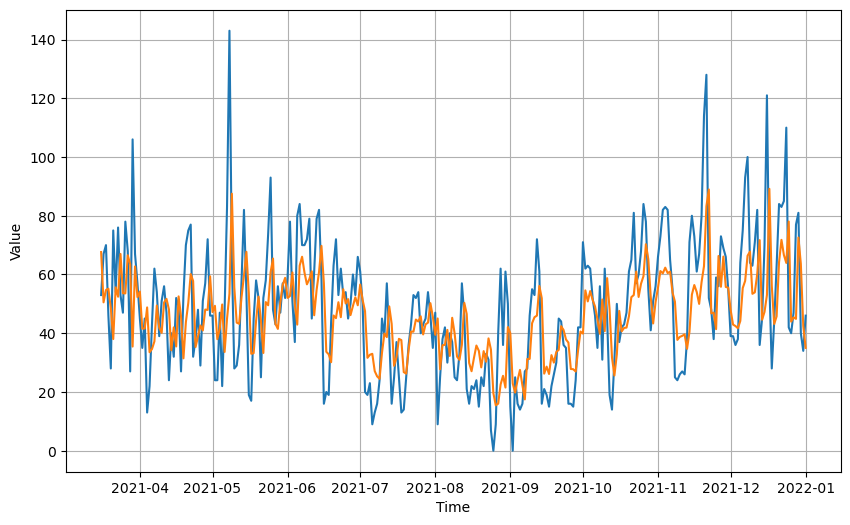

In [ ]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(cnn_model, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

The code block evaluates the predictions of the CNN model using the evaluation metrics defined earlier and stores the results in the results_conv variable.

In [ ]:
# Evaluate preds
results_conv = evaluate_preds(y_true=x_valid, # reduce to right shape
                                 y_pred=results)
results_conv

{'mae': 14.426769,
 'mse': 352.57755,
 'rmse': 18.777048,
 'mape': 145704600.0,
 'mase': 0.9770048,
 'r2': 0.32911193}

**Compare Results**

In [ ]:
# Compare different model results
model_results = pd.DataFrame({"Model_Dense1": results_base,
                              "Simple RNN": results_rnn,
                              "Bi-LSTM": results_bilstm,
                              "Conv1D + LSTM": results_convlstm,
                              "Conv1D": results_conv,
                             }).T
model_results = model_results.sort_values(by="mae")

model_results.head(10)

,mae,mse,rmse,mape,mase,r2
Bi-LSTM,13.859715,321.411438,17.927952,130432976.0,0.938603,0.388415
Simple RNN,13.873719,336.529236,18.344732,64378080.0,0.939551,0.359649
Model_Dense1,14.347912,355.897675,18.865250,62194288.0,0.971664,0.322794
Conv1D,14.426769,352.577545,18.777048,145704608.0,0.977005,0.329112
Conv1D + LSTM,14.855733,368.234894,19.189447,117767864.0,1.006055,0.299319


The table above shows the results of different models compared based on various evaluation metrics. The models include Dense1, Simple RNN, Bi-LSTM, Conv1D, and Conv1D + LSTM. The models are sorted by mean absolute error (MAE) in ascending order, indicating the best-performing models at the top. The Bi-LSTM model achieved the lowest MAE of 13.86, followed closely by the Simple RNN model with an MAE of 13.87. The Model_Dense1 and Conv1D models obtained slightly higher MAE values of 14.35 and 14.43, respectively. The Conv1D + LSTM model had the highest MAE of 14.86. When considering other metrics such as mean squared error (MSE), root mean squared error (RMSE), mean absolute percentage error (MAPE), mean absolute scaled error (MASE), and R-squared (R2), the models exhibit varying performance. Overall, the Bi-LSTM and Simple RNN models seem to perform the best, based on their low MAE values.

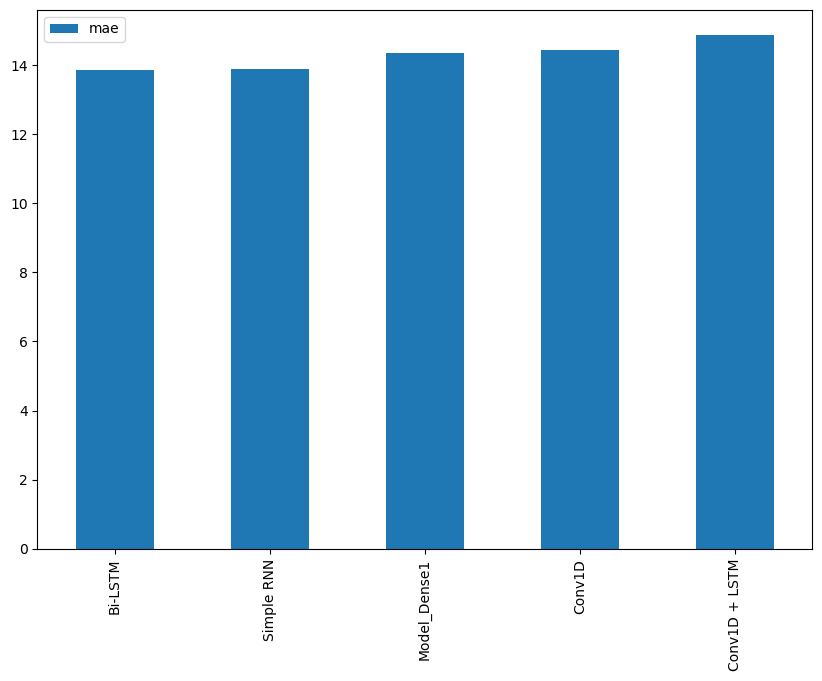

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");